In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import shap

# Explarotary Data Analysis 

In [35]:
path=r'/kaggle/input/driver-application-status/TLC_New_Driver_Application_Status.csv'
df=pd.read_csv(path)
df.head()

,App No,Type,App Date,Status,FRU Interview Scheduled,Drug Test,WAV Course,Defensive Driving,Driver Exam,Medical Clearance Form,Other Requirements,Last Updated
0,6078403,HDR,07/16/2024,Incomplete,Not Applicable,Needed,Needed,Needed,Needed,Needed,Fingerprints needed; Copy of DMV license needed,07/17/2024 05:00:01 AM
1,6077989,HDR,07/09/2024,Incomplete,Not Applicable,Needed,Needed,Complete,Needed,Needed,Fingerprints needed; Copy of DMV license needed,07/17/2024 05:00:01 AM
2,6074279,HDR,05/09/2024,Incomplete,Not Applicable,Needed,Needed,Complete,Needed,Needed,Fingerprints needed; Copy of DMV license needed,07/17/2024 05:00:01 AM
3,5735329,HDR,10/17/2016,Incomplete,Not Applicable,Complete,Complete,Complete,Needed,Complete,Copy of DMV license needed,07/17/2024 05:00:01 AM
4,6077157,HDR,06/24/2024,Incomplete,Not Applicable,Complete,Complete,Complete,Needed,Complete,Not Applicable,07/17/2024 05:00:01 AM


In [36]:
df.isnull().sum()

App No                     0
Type                       0
App Date                   0
Status                     0
FRU Interview Scheduled    0
Drug Test                  0
WAV Course                 0
Defensive Driving          0
Driver Exam                0
Medical Clearance Form     0
Other Requirements         0
Last Updated               0
dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3496 entries, 0 to 3495
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   App No                   3496 non-null   int64 
 1   Type                     3496 non-null   object
 2   App Date                 3496 non-null   object
 3   Status                   3496 non-null   object
 4   FRU Interview Scheduled  3496 non-null   object
 5   Drug Test                3496 non-null   object
 6   WAV Course               3496 non-null   object
 7   Defensive Driving        3496 non-null   object
 8   Driver Exam              3496 non-null   object
 9   Medical Clearance Form   3496 non-null   object
 10  Other Requirements       3496 non-null   object
 11  Last Updated             3496 non-null   object
dtypes: int64(1), object(11)
memory usage: 327.9+ KB


In [38]:
df.dtypes

App No                      int64
Type                       object
App Date                   object
Status                     object
FRU Interview Scheduled    object
Drug Test                  object
WAV Course                 object
Defensive Driving          object
Driver Exam                object
Medical Clearance Form     object
Other Requirements         object
Last Updated               object
dtype: object

In [39]:
df.columns

Index(['App No', 'Type', 'App Date', 'Status', 'FRU Interview Scheduled',
       'Drug Test', 'WAV Course', 'Defensive Driving', 'Driver Exam',
       'Medical Clearance Form', 'Other Requirements', 'Last Updated'],
      dtype='object')

In [40]:
for x in df.columns:
    print(f'Column {x} has unique values: {df[x].unique()}')
    print()

Column App No has unique values: [6078403 6077989 6074279 ... 6078178 6076907 6078293]

Column Type has unique values: ['HDR' 'PDR' 'VDR']

Column App Date has unique values: ['07/16/2024' '07/09/2024' '05/09/2024' '10/17/2016' '06/24/2024'
 '06/10/2024' '05/17/2024' '05/24/2024' '05/27/2024' '06/18/2024'
 '07/07/2024' '07/13/2024' '06/29/2024' '06/22/2024' '05/13/2024'
 '03/31/2024' '06/07/2024' '07/05/2024' '05/04/2024' '07/15/2024'
 '05/21/2024' '06/13/2024' '06/08/2024' '04/22/2024' '05/11/2024'
 '07/12/2024' '06/06/2024' '07/03/2024' '04/11/2024' '06/23/2024'
 '06/14/2024' '04/26/2024' '05/15/2024' '05/23/2024' '03/27/2017'
 '04/05/2024' '04/08/2024' '04/18/2024' '07/10/2024' '04/16/2024'
 '04/04/2024' '04/10/2024' '06/09/2024' '05/30/2024' '05/01/2024'
 '04/29/2024' '05/28/2024' '06/20/2024' '04/12/2024' '06/28/2024'
 '07/02/2024' '05/16/2024' '06/11/2024' '05/20/2024' '06/01/2024'
 '06/17/2024' '06/19/2024' '05/29/2024' '06/30/2024' '05/22/2024'
 '05/08/2024' '06/25/2024' '07/11

In [41]:
df=df.drop(['App No', 'Last Updated'], axis=1)

In [42]:
df['App Date'] = pd.to_datetime(df['App Date'])
df = df.sort_values(by='App Date')
df['App Date'] = df['App Date'].dt.strftime('%m/%d/%Y')

df.head()

,Type,App Date,Status,FRU Interview Scheduled,Drug Test,WAV Course,Defensive Driving,Driver Exam,Medical Clearance Form,Other Requirements
1344,PDR,04/28/1997,Incomplete,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Fingerprints & other items needed. Visit www.n...
3335,PDR,04/28/1997,Incomplete,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Fingerprints & other items needed. Visit www.n...
3248,PDR,04/28/1997,Incomplete,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Fingerprints & other items needed. Visit www.n...
3,HDR,10/17/2016,Incomplete,Not Applicable,Complete,Complete,Complete,Needed,Complete,Copy of DMV license needed
36,HDR,03/27/2017,Incomplete,Not Applicable,Complete,Complete,Complete,Needed,Complete,Not Applicable


In [43]:
df['App Date'].unique()

array(['04/28/1997', '10/17/2016', '03/27/2017', '05/29/2017',
       '02/06/2018', '11/14/2023', '01/23/2024', '01/30/2024',
       '02/02/2024', '02/07/2024', '02/10/2024', '02/16/2024',
       '02/19/2024', '02/27/2024', '02/28/2024', '03/04/2024',
       '03/06/2024', '03/07/2024', '03/11/2024', '03/15/2024',
       '03/19/2024', '03/24/2024', '03/25/2024', '03/27/2024',
       '03/28/2024', '03/29/2024', '03/30/2024', '03/31/2024',
       '04/01/2024', '04/02/2024', '04/03/2024', '04/04/2024',
       '04/05/2024', '04/06/2024', '04/07/2024', '04/08/2024',
       '04/09/2024', '04/10/2024', '04/11/2024', '04/12/2024',
       '04/13/2024', '04/14/2024', '04/15/2024', '04/16/2024',
       '04/17/2024', '04/18/2024', '04/19/2024', '04/20/2024',
       '04/21/2024', '04/22/2024', '04/23/2024', '04/24/2024',
       '04/25/2024', '04/26/2024', '04/27/2024', '04/28/2024',
       '04/29/2024', '04/30/2024', '05/01/2024', '05/02/2024',
       '05/03/2024', '05/04/2024', '05/05/2024', '05/06

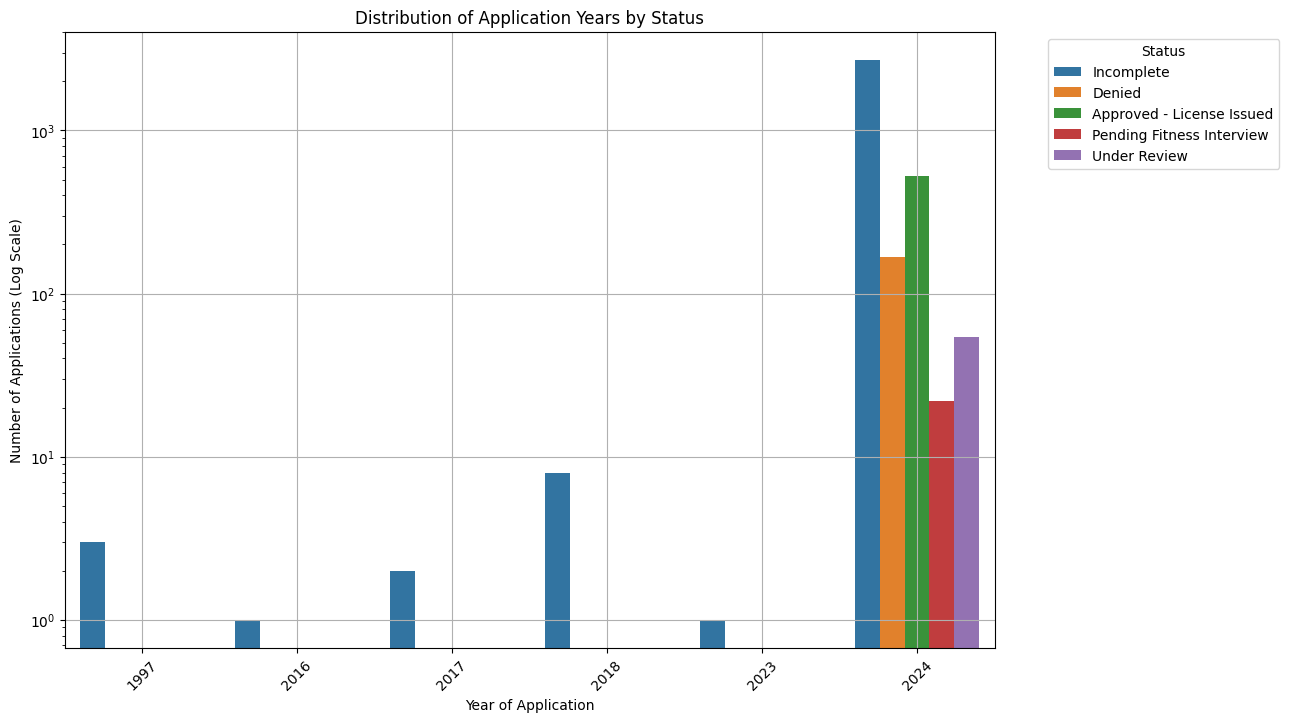

In [44]:
df['App Date'] = pd.to_datetime(df['App Date'])
df['App Year'] = df['App Date'].dt.year

plt.figure(figsize=(12, 8))
sns.countplot(x='App Year', hue='Status', data=df)

plt.yscale('log')  # Set the y-axis to log scale if needed
plt.xlabel('Year of Application')
plt.ylabel('Number of Applications (Log Scale)')
plt.title('Distribution of Application Years by Status')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

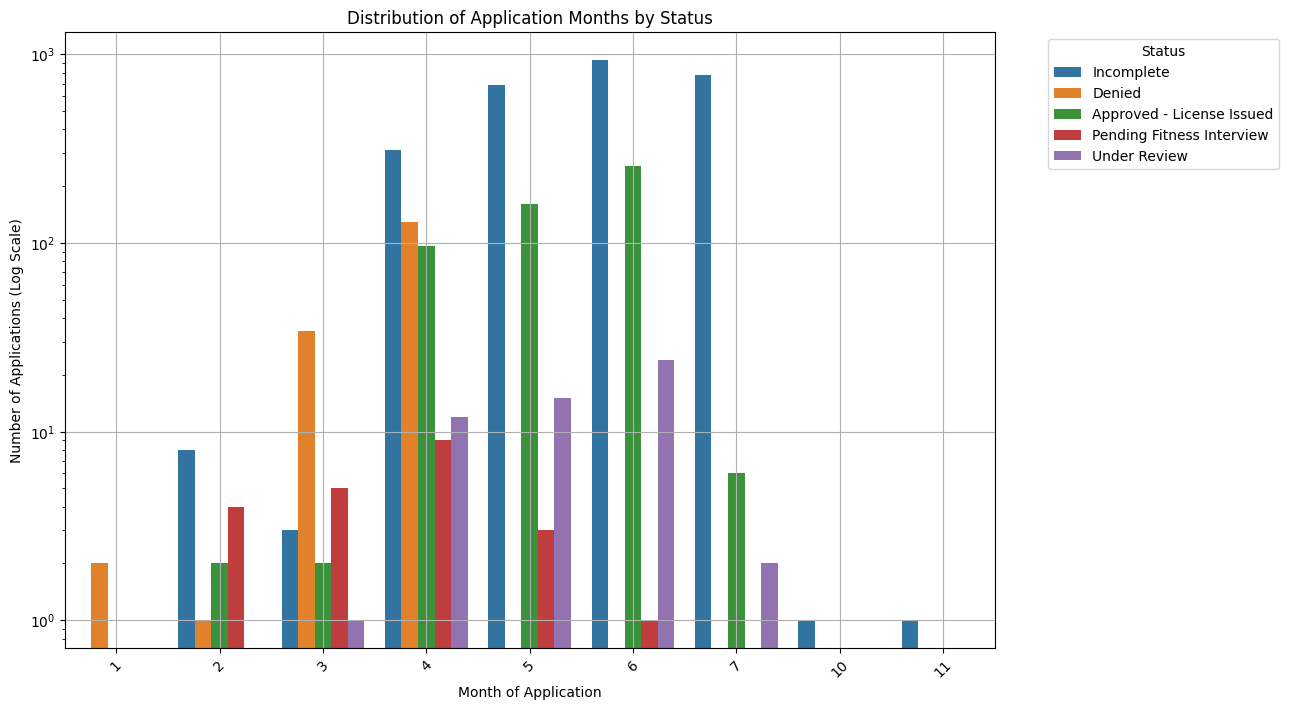

In [45]:
df['App Month'] = df['App Date'].dt.month

plt.figure(figsize=(12, 8))
sns.countplot(x='App Month', hue='Status', data=df)

plt.yscale('log')  # Set the y-axis to log scale if needed
plt.xlabel('Month of Application')
plt.ylabel('Number of Applications (Log Scale)')
plt.title('Distribution of Application Months by Status')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Interpretation

It is important to note that there is a significant concentration of applications submitted in the year 2024, which aligns closely with the company's current hiring priorities. Given this focus, it is advisable to narrow our analysis to the applications from 2024 exclusively. Consequently, we should exclude the data from the years 1997, 2016, 2017, 2018, and 2023 to maintain a targeted approach.



The analysis reveals that the month of application has a noticeable impact on the distribution of application statuses. The data shows a distinct variation in the distribution of statuses throughout the different months. This indicates that certain months may influence the likelihood of an application being incomplete, denied, or successfully approved, suggesting a potential seasonal or procedural effect on the application outcomes.



In [46]:
df['App Year'] = df['App Date'].dt.year
df = df[~df['App Year'].isin([1997, 2016, 2017, 2018, 2023])]
df.head()

,Type,App Date,Status,FRU Interview Scheduled,Drug Test,WAV Course,Defensive Driving,Driver Exam,Medical Clearance Form,Other Requirements,App Year,App Month
2190,HDR,2024-01-23,Denied,05/30/2024,Complete,Complete,Needed,Complete,Complete,Copy of DMV license needed,2024,1
3348,HDR,2024-01-30,Denied,Not Applicable,Complete,Complete,Needed,Complete,Complete,Copy of DMV license needed,2024,1
1715,HDR,2024-02-02,Approved - License Issued,Not Applicable,Complete,Complete,Complete,Complete,Complete,Not Applicable,2024,2
2782,HDR,2024-02-07,Pending Fitness Interview,06/17/2024,Complete,Complete,Complete,Complete,Complete,Not Applicable,2024,2
429,HDR,2024-02-10,Pending Fitness Interview,06/04/2024,Complete,Complete,Complete,Complete,Complete,Not Applicable,2024,2


In [47]:
df=df.drop(['App Year', 'FRU Interview Scheduled'], axis=1)

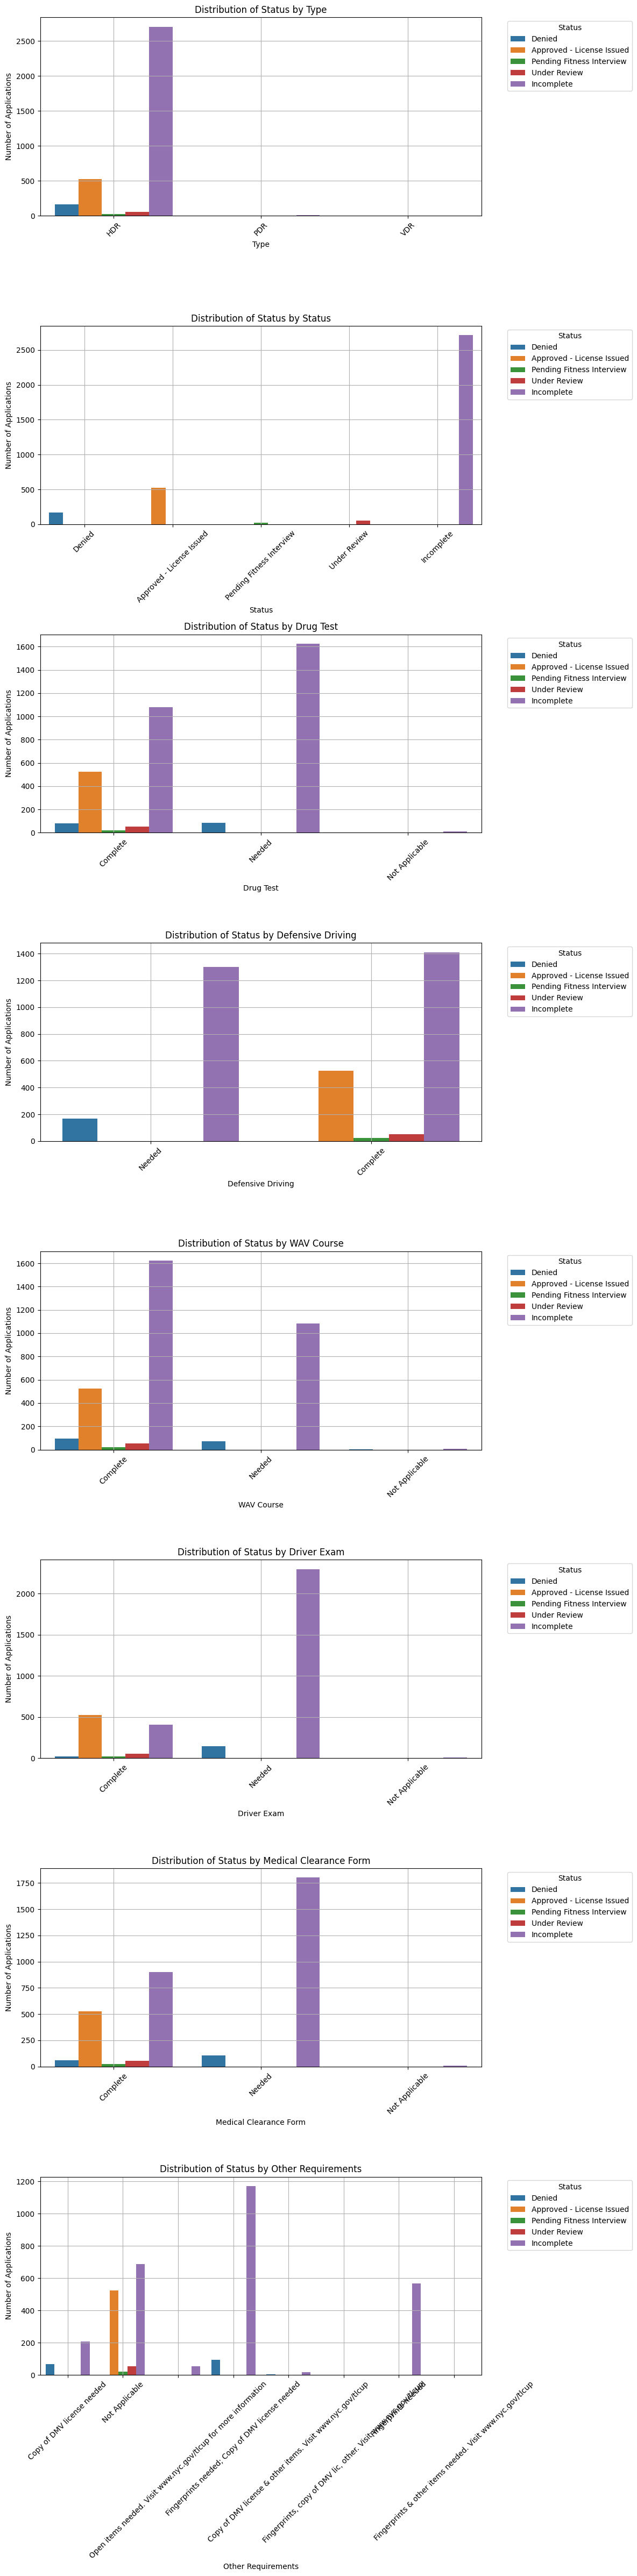

In [48]:
categorical_columns = ['Type', 'Status', 'Drug Test', 'Defensive Driving', 'WAV Course', 'Driver Exam', 'Medical Clearance Form', 'Other Requirements']

fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(12, 6 * len(categorical_columns)))

for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, hue='Status', data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of Status by {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Number of Applications')
    axes[i].legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
    axes[i].grid(True)
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels by 45 degrees

plt.tight_layout()
plt.show()

### Interpretation

A significant portion of the applications are categorized as "Incomplete," indicating that a substantial number of them are not fully processed. Completing all required steps in the application process is essential for achieving a successful and approved status.


The current state of the data—particularly the imbalance and the high incidence of incomplete applications—suggests that ML models may not yield reliable or meaningful results.

# Model Training

### Label Encoding & Splitting

In [49]:
le=LabelEncoder()

for col in categorical_columns:
    df[col]=le.fit_transform(df[col])


df.head()

,Type,App Date,Status,Drug Test,WAV Course,Defensive Driving,Driver Exam,Medical Clearance Form,Other Requirements,App Month
2190,0,2024-01-23,1,0,0,1,0,0,1,1
3348,0,2024-01-30,1,0,0,1,0,0,1,1
1715,0,2024-02-02,0,0,0,0,0,0,6,2
2782,0,2024-02-07,3,0,0,0,0,0,6,2
429,0,2024-02-10,3,0,0,0,0,0,6,2


In [50]:
df=df.drop('App Date', axis=1)
X=df.drop('Status', axis=1)
y=df['Status']

In [52]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42, test_size=0.2)

### Models & Evaluation

In [66]:
def evaluate_classification_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average=None)
    recall = recall_score(y_true, y_pred, average=None)
    f1 = f1_score(y_true, y_pred, average=None)
    
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision per class: {precision}')
    print(f'Recall per class: {recall}')
    print(f'F1 Score per class: {f1}')
    
    print("\nClassification Report:\n")
    print(classification_report(y_true, y_pred))
    
    return accuracy, precision, recall, f1

def evaluate_model_performance(model, X_train, y_train, X_test, y_test):
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    print(f'Train Accuracy: {train_accuracy:.4f}')
    print(f'Test Accuracy: {test_accuracy:.4f}')
    
    # If the model has a loss function, print loss (e.g., for XGBoost)
    if hasattr(model, 'evals_result_'):
        evals_result = model.evals_result()
        print("\nTraining Loss: ", evals_result['validation_0']['logloss'][-1])
        print("Test Loss: ", evals_result['validation_1']['logloss'][-1])
        
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

def plot_shap_values(model, X_train):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_train)
    shap.summary_plot(shap_values[1], X_train, plot_type="bar")

## Training Models

In [59]:
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42, eval_metric="mlogloss")

In [61]:
rf_model.fit(Xtrain, ytrain)
xgb_model.fit(Xtrain, ytrain, eval_set=[(Xtrain, ytrain), (Xtest, ytest)], verbose=False)

rf_pred = rf_model.predict(Xtest)
xgb_pred = xgb_model.predict(Xtest)

#### Random Forest

In [62]:
evaluate_classification_model(ytest, rf_pred)

Accuracy: 0.9598
Precision per class: [0.90225564 0.80952381 0.98653846 1.         0.        ]
Recall per class: [1.         0.82926829 0.98464491 0.4        0.        ]
F1 Score per class: [0.9486166  0.81927711 0.98559078 0.57142857 0.        ]

Classification Report:

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       120
           1       0.81      0.83      0.82        41
           2       0.99      0.98      0.99       521
           3       1.00      0.40      0.57         5
           4       0.00      0.00      0.00        10

    accuracy                           0.96       697
   macro avg       0.74      0.64      0.66       697
weighted avg       0.95      0.96      0.95       697



Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


(0.9598278335724534,
 array([0.90225564, 0.80952381, 0.98653846, 1.        , 0.        ]),
 array([1.        , 0.82926829, 0.98464491, 0.4       , 0.        ]),
 array([0.9486166 , 0.81927711, 0.98559078, 0.57142857, 0.        ]))

In [63]:
evaluate_model_performance(rf_model, Xtrain, ytrain, Xtest, ytest)

Train Accuracy: 0.9652
Test Accuracy: 0.9598


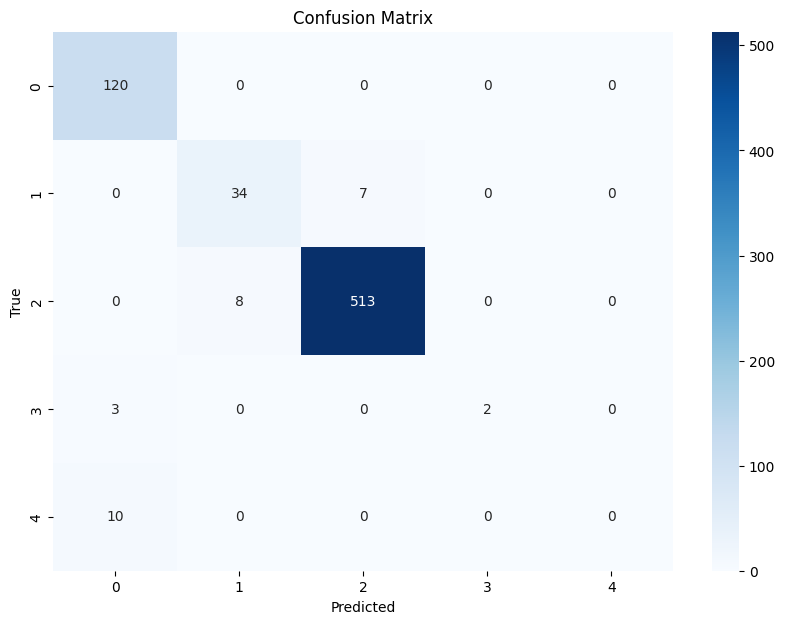

In [67]:
plot_confusion_matrix(ytest, rf_pred, labels=rf_model.classes_)

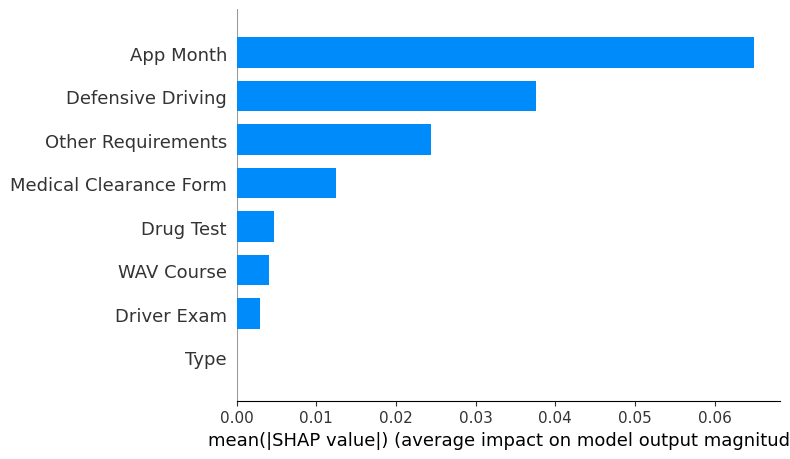

In [68]:
plot_shap_values(rf_model, Xtrain)

#### XGBoost

In [69]:
evaluate_classification_model(ytest, xgb_pred)

Accuracy: 0.9627
Precision per class: [0.90225564 0.80434783 0.99224806 1.         0.        ]
Recall per class: [1.         0.90243902 0.98272553 0.4        0.        ]
F1 Score per class: [0.9486166  0.85057471 0.98746384 0.57142857 0.        ]

Classification Report:

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       120
           1       0.80      0.90      0.85        41
           2       0.99      0.98      0.99       521
           3       1.00      0.40      0.57         5
           4       0.00      0.00      0.00        10

    accuracy                           0.96       697
   macro avg       0.74      0.66      0.67       697
weighted avg       0.95      0.96      0.96       697



Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


(0.9626972740315638,
 array([0.90225564, 0.80434783, 0.99224806, 1.        , 0.        ]),
 array([1.        , 0.90243902, 0.98272553, 0.4       , 0.        ]),
 array([0.9486166 , 0.85057471, 0.98746384, 0.57142857, 0.        ]))

In [70]:
evaluate_model_performance(xgb_model, Xtrain, ytrain, Xtest, ytest)

Train Accuracy: 0.9644
Test Accuracy: 0.9627


KeyError: 'logloss'

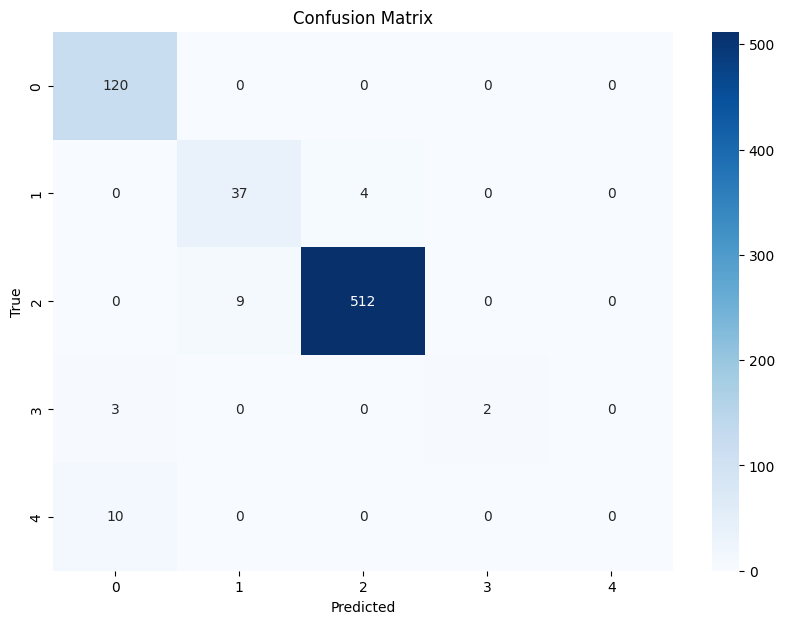

In [71]:
plot_confusion_matrix(ytest, xgb_pred, labels=xgb_model.classes_)

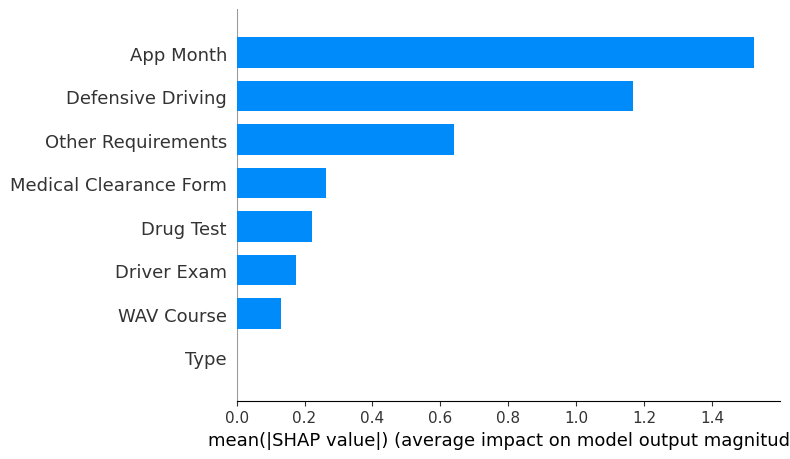

In [72]:
plot_shap_values(xgb_model, Xtrain)

# Interpretation

XGBoost demonstrated slightly better performance compared to Random Forest, although the difference between the two models is minimal. Both models produced similar SHAP values, indicating they identified the same key features. However, the dataset exhibits class imbalance, which led to one class being overrepresented in the predictions due to an insufficient number of samples for the other classes.